# PTI-Clima Notebooks  <img src="https://www.r-project.org/logo/Rlogo.png" alt="Description" width="60" height="40">

***

> Este cuaderno o notebook muestra las operaciones básicas para comenzar a trabajar con los conjuntos de datos de la PTI-Clima que se incluyen en el [almacén de datos](https://pti.climate.ifca.es/data). Este trabajo está licenciado bajo una [Licencia Creative Commons Atribución 4.0 Internacional](http://creativecommons.org/licenses/by/4.0).
>
> ![Licencia de Creative Commons](https://i.creativecommons.org/l/by/4.0/88x31.png)


## Intercomparación de rejillas observacionales

**M. Iturbide** (Instituto de Física de Cantabria, CSIC-Universidad de Cantabria, Santander, Spain).

**¡Bienvenidos al notebook de *Intercomparación de rejillas observacionales* de la Plataforma Virtual de Cálculo de la PTI-Clima!**  
Esta guía está diseñada para ayudarte a sacar el máximo provecho de los numerosos recursos disponibles en el [**Almacén de Datos de la PTI-Clima**](https://pti.climate.ifca.es/data). A través de esta plataforma, podrás realizar investigaciones y **análisis climáticos de relevancia**, ya que ofrece **acceso transparente a una amplia gama de materiales y datos** subyacentes a los **servicios climáticos desarrollados en la PTI-Clima**, fomentando su **reutilización** y posibilitando la **reproducibilidad** de los productos generados.

En el directorio principal encontrarás el notebook de [**primeros_pasos_R.ipynb**](../../primeros_pasos_R.ipynb) que describe el **objetivo general y la motivación** detrás de esta plataforma virtual, aclarando su propósito y relevancia en el ámbito de la investigación climática. Además, describe el material disponible, brindándote una visión de los diversos conjuntos de datos y recursos a tu disposición para el análisis climático. Finalmente, ilustra **los pasos fundamentales para comenzar a trabajar de manera efectiva con datos climáticos**. 

Esta plataforma cuenta con **software preinstalado y listo para usar** para gestionar y realizar operaciones con datos climáticos. Este software consiste en un conjunto de **paquetes de R**, conocido como el **framework `climate4R`** (Iturbide et al., 2019. DOI: [10.1016/j.envsoft.2018.09.009](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub)), que puede seleccionarse desde el menú de kernel. Para más información, visita [el repositorio de climate4R en GitHub](https://github.com/SantanderMetGroup/climate4R).

<img src="https://raw.githubusercontent.com/SantanderMetGroup/climate4R/refs/heads/devel/man/figures/climate4R_logo.svg" alt="Description" width="60" height="40">

***climate4R*** ofrece más funcionalidades de las que se ilustran en este notebook, como **funcionalidades de operaciones espaciales y temporales** o como **interpolación, subsetting o intersección espacial**. Además, brinda funcionalidades para la **corrección de sesgo y downscaling**. Consulta [Iturbide et al., 2019](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub) y el repositorio de [github de climate4R](https://github.com/SantanderMetGroup/climate4R) para más información.

Para usuarios de Python, también se dispone de un entorno **`python 3`**. Es importante señalar, no obstante, que en este caso el software preinstalado es más básico.


### Contenido de este cuaderno
1) Objetivo y motivación  
2) Descripción del material disponible en el datalab  
3) Carga de datos y operaciones básicas de datos
   * 3.1. Carga de librerías
   * 3.2. Carga de datos
   * 3.3. Estructura de la cuadrícula *climate4R*
   * 3.4. Gráficos iniciales de exploración de datos
   * 3.5. Agregación espacial

Antes de empezar definiremos el heap space de java.

In [1]:
options(java.parameters = "-Xmx20g")

Antes de empezar, o en cualquier momento durante el cuaderno, podemos personalizar el área de visualización de gráficos de la siguiente manera:

In [2]:
library(repr)
# Change plot size 
options(repr.plot.width=8, repr.plot.height=5)

***

### 1. Carga de librerías

Las librerías/paquetes centrales de ***climate4R*** que permiten **cargar y transformar** datos (p. ej., agregaciones espaciotemporales) y **visualizarlos** son `loadeR`, `transformeR` y `visualizeR`.

In [3]:
library(loadeR)
library(transformeR)
library(visualizeR)

Loading required package: rJava

Loading required package: loadeR.java

Java version 22x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.6 (2023-06-26) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.8.1 (2023-06-22) is loaded


Get the latest stable version (1.8.2) using <devtools::install_github(c('SantanderMetGroup/climate4R.UDG','SantanderMetGroup/loadeR'))>

Please use 'citation("loadeR")' to cite this package.




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded


Get the latest stable version (2.2.3) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

visualizeR version 1.6.4 (2023-10-26) is loaded

Please see 'citation("visualizeR")' to cite this package.



Sin embargo, el software incluye todo el framework *climate4R* y otras bibliotecas útiles. Por ejemplo, incluye la potente biblioteca de gráficos `lattice` o la biblioteca `magrittr` para operaciones en tuberías (a través de `%>%`).

In [4]:
library(lattice)
library(magrittr)

### 2. Selección de conjuntos de datos

El inventario (`data_inventory.csv`) cataloga la lista de archivos del [**Almacén de datos de la PTI-Clima**](https://pti.climate.ifca.es/data).

Simplemente necesitamos leer este archivo con la función `read.csv` para obtener el `data.frame` con esta información, que contiene seis columnas: `location`, `type`, `variable`, `project`, `experiment`, `frequency`.

In [5]:
df <- read.csv("../../data_inventory.csv")

In [6]:
str(df)

'data.frame':	118 obs. of  9 variables:
 $ dataset   : chr  "AEMET-5KM-regular_Iberia_day" "CHELSA-W5E5v1.0_Canarias_day" "CHELSA-W5E5v1.0_Iberia_day" "PTI-grid-v0_Canarias_day" ...
 $ type      : chr  "observations" "observations" "observations" "observations" ...
 $ access    : chr  "opendap" "opendap" "opendap" "opendap" ...
 $ source    : chr  "AEMET-5KM-regular" "CHELSA-W5E5v1.0" "CHELSA-W5E5v1.0" "PTI-grid-v0" ...
 $ provider  : chr  "" "" "" "" ...
 $ experiment: chr  "" "" "" "" ...
 $ frequency : chr  "day" "day" "day" "day" ...
 $ endpoint  : chr  "https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/AEMET-5KM-regular_Iberia_day.ncml" "https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Canarias_day.ncml" "https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Iberia_day.ncml" "https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Canarias_day.ncml" ...
 $ dictionary: chr  "../../Har

Podremos ver las primeras filas del `data.frame` resultande con la función `head`.

In [7]:
head(df)

,dataset,type,access,source,provider,experiment,frequency,endpoint,dictionary
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AEMET-5KM-regular_Iberia_day,observations,opendap,AEMET-5KM-regular,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/AEMET-5KM-regular_Iberia_day.ncml,../../Harmonization_dictionaries/AEMET-5KM-regular.dic
2,CHELSA-W5E5v1.0_Canarias_day,observations,opendap,CHELSA-W5E5v1.0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Canarias_day.ncml,../../Harmonization_dictionaries/CHELSA-W5E5v1.0.dic
3,CHELSA-W5E5v1.0_Iberia_day,observations,opendap,CHELSA-W5E5v1.0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Iberia_day.ncml,../../Harmonization_dictionaries/CHELSA-W5E5v1.0.dic
4,PTI-grid-v0_Canarias_day,observations,opendap,PTI-grid-v0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Canarias_day.ncml,../../Harmonization_dictionaries/PTI-grid-v0.dic
5,PTI-grid-v0_Iberia_day,observations,opendap,PTI-grid-v0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Iberia_day.ncml,../../Harmonization_dictionaries/PTI-grid-v0.dic
6,CORDEX_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day,projections,opendap,CORDEX,ESGF,historical,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEX_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic


Se observan diferentes columnas o campos que describen los datos:

* `dataset` se refiere al nombre que se le da a cada instancia de datos en el almacén.
* `type` se refiere al tipo de los conjuntos de datos, ya sea "observaciones" (observations), "reanalisis" (reanalysis) o proyecciones (projections).
* `source` se refiere al conjuntos de datos de origen (p. ej., CORDEX-EUR, CMIP5, CMIP6, etc.).  
* `provider` se refiere a la entidad distribuidora de donde se obtuvieron los datos originales.  
* `access` se refiere al modo de acceso, ya sea local (netcdf) o remoto (opendap).
* `experiment` se refiere al escenario (p. ej., historical, rcp26, ssp126, rcp85, etc.).
* `frequency` se refiere a la escala temporal de los datos.
* `endpoint` se refiere a la ruta del archivo de datos. Esta ruta es la que se utilizará para cargar los datos más adelante.
* `dictionary` se refiere al archivo que determina el tipo de conversiones necesarias (unidades y nombre de variable) para cargar los datos de manera armonizada, independientemente de las características diferenciadas de los datasets en origen.

Podemos **aplicar fácilmente filtros** para obtener el archivo deseado. El objetivo de este notebook es intercomparar las rejillas observacionales disponibles (incluyendo reanalysis), por lo tanto, filtraremos el catálogo de datos por tipo (`type`). Nos quedaremos con el nombre del `dataset`, el `endpoint` y el `dictionary`.

In [8]:
obs <- subset(df, type == "observations")[c("dataset", "endpoint", "dictionary")]
rea <- subset(df, type == "reanalysis")[c("dataset", "endpoint", "dictionary")]
datasets <- rbind(obs, rea) %>% print

                         dataset
1   AEMET-5KM-regular_Iberia_day
2   CHELSA-W5E5v1.0_Canarias_day
3     CHELSA-W5E5v1.0_Iberia_day
4       PTI-grid-v0_Canarias_day
5         PTI-grid-v0_Iberia_day
117       ERA5-Land_Canarias_day
118         ERA5-Land_Iberia_day
                                                                                               endpoint
1   https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/AEMET-5KM-regular_Iberia_day.ncml
2   https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Canarias_day.ncml
3     https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Iberia_day.ncml
4       https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Canarias_day.ncml
5         https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Iberia_day.ncml
117         https://data.meteo.unican.es/thredds/dodsC/PTI-clima/reanalysis/ERA5-Land_Canarias_day.ncml
118     

En este caso, optaremos por la región de España peninsular y Baleares. Estos son los datasets que contienen `Iberia` en su nombre.

In [9]:
ind <- grep("Iberia", datasets$dataset)
datasets <- datasets[ind,] %>% print

                         dataset
1   AEMET-5KM-regular_Iberia_day
3     CHELSA-W5E5v1.0_Iberia_day
5         PTI-grid-v0_Iberia_day
118         ERA5-Land_Iberia_day
                                                                                               endpoint
1   https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/AEMET-5KM-regular_Iberia_day.ncml
3     https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Iberia_day.ncml
5         https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Iberia_day.ncml
118           https://data.meteo.unican.es/thredds/dodsC/PTI-clima/reanalysis/ERA5-Land_Iberia_day.ncml
                                                dictionary
1   ../../Harmonization_dictionaries/AEMET-5KM-regular.dic
3     ../../Harmonization_dictionaries/CHELSA-W5E5v1.0.dic
5         ../../Harmonization_dictionaries/PTI-grid-v0.dic
118         ../../Harmonization_dictionaries/ERA5-Land.dic


Una vez que tenemos los datasets y sus `endpoint`, podemos mostrar fácilmente las características de los datos que contienen. Para hacerlo, empleamos la función `dataInventory` del paquete `loadeR`. Por ejemplo, para el dataset **AEMET-5KM-regular_Iberia_day**, realizaremos el inventario de la siguiente manera.

In [10]:
AEMET5KM.endpoint <- subset(datasets, dataset == "AEMET-5KM-regular_Iberia_day")[["endpoint"]]
di <- dataInventory(AEMET5KM.endpoint)

[2025-01-16 13:43:22.262887] Doing inventory ...

[2025-01-16 13:43:22.744754] Opening dataset...

[2025-01-16 13:43:31.216869] The dataset was successfuly opened

[2025-01-16 13:43:32.380496] Retrieving info for 'pr' (2 vars remaining)

[2025-01-16 13:43:32.55141] Retrieving info for 'tasmax' (1 vars remaining)

[2025-01-16 13:43:32.662883] Retrieving info for 'tasmin' (0 vars remaining)

[2025-01-16 13:43:32.729515] Done.



Podemos echar un primer vistazo a la información disponible con `str`.

In [11]:
str(di)

List of 3
 $ pr    :List of 7
  ..$ Description: chr "precipitation amount"
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:3] 26298 170 273
  ..$ Units      : chr "kg m-2"
  ..$ DataSizeMb : num 4882
  ..$ Version    : logi NA
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "1.0 days"
  .. .. ..$ Units     : chr "days since 1951-01-01 00:00:00"
  .. .. ..$ Date_range: chr "1951-01-01T00:00:00Z - 2022-12-31T00:00:00Z"
  .. ..$ lat :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:170] 35.3 35.3 35.4 35.4 35.5 ...
  .. .. ..$ Shape      : int 170
  .. .. ..$ Coordinates: chr "lat"
  .. ..$ lon :List of 5
  .. .. ..$ Type       : chr "Lon"
  .. .. ..$ Units      : chr "degrees_east"
  .. .. ..$ Values     : num [1:273] -9.32 -9.27 -9.22 -9.17 -9.12 ...
  .. .. ..$ Shape      : int 273
  .. .. ..$ Coordinates: chr "lon"
 $ tasmax:List of 7
  

Vemos que, para este dataset, hay tres variables disponibles: pr, tasmax y tasmin. Para cada una de ellas se detalla información adicional, como las unidades,el periodo temporal que cubren, las coordenadas etc.

### 3. Carga de datos


La carga de datos se realiza mediante la función `loadGridData` especificando, como fuente de datos, la ruta de un archivo NetCDF o de un catálogo NcML. En nuestro caso, esa ruta es precisamente lo que encapsula el objeto `endpoint` que hemos definido anteriormente.

También es necesario especificar el parámetro `var`, que en este ejemplo se establece como `tasmax` (temperatura superficial maxima). Ten en cuenta que `loadGridData` permite establecer parámetros adicionales. Por ejemplo, podríamos utilizar los parámetros `lonLim` y `latLim` para cargar únicamente el subconjunto de datos correspondiente a una región más pequeña. Si no se emplean estos parámetros se carga el dominio completo (como en este caso). Otro parámetro útil es `season`, para cargar datos de meses específicos (en este ejemplo, JJA para el verano boreal). En el parámetro `years`, especificamos el periodo deseado (en este caso, 1991-2020). El parámetro que habilita la carga de datos armonizados es `dictionary`. Para obtener detalles sobre el funcionamiento de los diccionarios, puedes consultar el notebook `primeros_pasos_R.ipynb`.

Ejecuta `help(loadGridData)` para consultar otros parámetros disponibles.  

La carga de datos puede tardar segundos o minutos dependiendo de la cantidad de datos que corresponda a la petición que hagamos. A continuación ilustramos la carga de datos de `AEMET-5KM-regular_Iberia_day`, definiendo previamente el `endpoint` y el `dictionary` concretos de este dataset.

In [12]:
dataset.i <- "AEMET-5KM-regular_Iberia_day"
endpoint.i <- subset(datasets, dataset == dataset.i)[["endpoint"]]
dic.i <- subset(datasets, dataset == dataset.i)[["dictionary"]]

In [13]:
tasmax.jja.aemet5km <- loadGridData(dataset = endpoint.i,
                           var = "tasmax",
                           season = 6:8,
                           years = 1991:2020,
                           dictionary = dic.i)

[2025-01-16 13:43:32.930043] Defining harmonization parameters for variable "tasmax"

[2025-01-16 13:43:33.02671] Opening dataset...

[2025-01-16 13:43:34.240161] The dataset was successfuly opened

[2025-01-16 13:43:34.247013] Defining geo-location parameters

[2025-01-16 13:43:34.361546] Defining time selection parameters

[2025-01-16 13:43:34.609643] Retrieving data subset ...

[2025-01-16 13:45:16.505786] Done



Obtenemos así un `grid` de `climate4R` con el que podemos operar de manera transparente (Consulta `primeros_pasos_R.ipynb` para más detalles), por ejemplo para generar el mapa de la media climatológica:

[2025-01-16 13:45:17.815952] - Computing climatology...

[2025-01-16 13:45:21.81262] - Done.



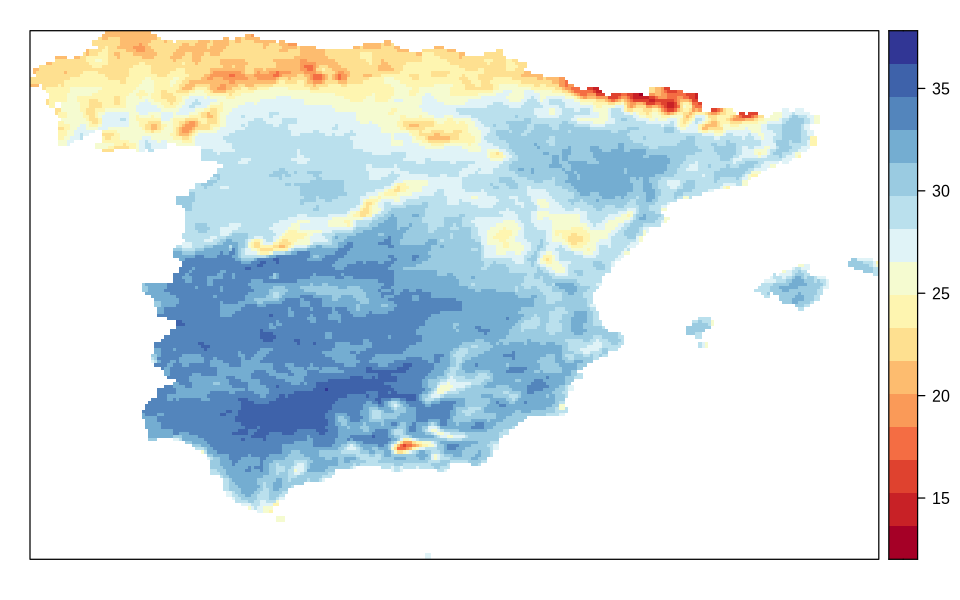

In [14]:
spatialPlot(climatology(tasmax.jja.aemet5km))

### 4. Carga y armonización de varios datasets

Si queremos proceder de manera más eficiente, pordemos automatizar la carga en un bucle. Primero, necesitamos conocer el periodo de tiempo que comparten los diferentes datasets. Para ello, podemos recurrir nuevamente a `dataInventory`, aplicado en un bucle esta vez. Extraeremos el atributo `Date_range`. Con extraer esta información para una de las variables (e.g. `di[[2]]`) es suficiente. También utilizaremos la función `suppressMessages` para evitar una larga lista de mensajes de salida.

In [15]:
di.all <- lapply(datasets$endpoint, function(d){
    di <- dataInventory(d)
    di[[2]]$Dimensions$time$Date_range
}) %>% suppressMessages
names(di.all) <- datasets$dataset
str(di.all)

List of 4
 $ AEMET-5KM-regular_Iberia_day: chr "1951-01-01T00:00:00Z - 2022-12-31T00:00:00Z"
 $ CHELSA-W5E5v1.0_Iberia_day  : chr "1979-01-01T12:00:00Z - 2016-12-30T12:00:00Z"
 $ PTI-grid-v0_Iberia_day      : chr "1961-01-01T00:00:00Z - 2022-12-31T00:00:00Z"
 $ ERA5-Land_Iberia_day        : chr "1950-02-01T00:00:00Z - 2022-12-31T00:00:00Z"


Como podemos ver en el resultado obtenido, todos los datasets cubren el periodo 1991-2020. Dado que cargar varios datasets para un periodo de 30 años ocupa mucha memoria, intentaremos reducir la carga sin comprometer los objetivos del análisis. En nuestro caso, no necesitamos el dato diario, así que realizaremos la agregación mensual en el momento de la carga con el arguento `aggr.m`, extrayendo el máximo de la temperatura máxima de cada mes. Además, utilizaremos los parámetros `lonLim` y `latLim`, para asegurarnos de que cargamos el mismo dominio en cada caso. Para ello, utilizaremos `AEMET-5KM-regular_Iberia_day` como referencia.

In [16]:
#borrar celda cuando se solucione
datasets <- datasets[-2,]
#datasets$dictionary[3] <- "../../Harmonization_dictionaries/ERA5-Land.dic"

In [17]:
latLim <- di$pr$Dimensions$lat$Values %>% range
lonLim <- di$pr$Dimensions$lon$Values %>% range

Ya podemos realizar la carga. Ten en cuenta que esta operación puede tardar minutos, ya que estamos cargando una gran cantidad de datos. Puedes guardar el objeto generado para evitar repetir esta operación en el futuro. Por ese motivo se incluye un `if` que comprueba si el objeto está creado anteriormente, y ejecuta la carga únicamente si el objeto no está en la ruta indicada (puedes modificar la ruta de `resulting.object.path`).

In [18]:
resulting.object.path <- "../../../tasmax.jja.rds"

if (!file.exists(resulting.object.path)) {
    
    tasmax.jja <- lapply(datasets$dataset, function(d) {
        dataset.i <- d
        endpoint.i <- subset(datasets, dataset == dataset.i)[["endpoint"]]
        dic.i <- subset(datasets, dataset == dataset.i)[["dictionary"]]
        loadGridData(dataset = endpoint.i,
                               lonLim = lonLim,
                               latLim = latLim,
                               var = "tasmax",
                               season = 6:8,
                               years = 1991:2020,
                               aggr.m = "max",
                               dictionary = dic.i)
    }) %>% suppressMessages
    
    names(tasmax.jja) <- datasets$dataset
    saveRDS(tasmax.jja, resulting.object.path)
    
} else {
    
    tasmax.jja <- readRDS(resulting.object.path)
    
}

#### 4.1. Interpolación a una malla común y unión de varios datasets en un único objeto grid
El objeto resultante de la operación anterior (aquí llamado `tasmax.jja`) es una lista de varios *grid* de *climate4R* (uno por cada dataset). Lo más cómodo es juntar toda esta información en un único *grid* que tenga una dimensión `member`, correspondiente a cada dataset. Sin embargo, para poder llevar a cabo esta operación es necesarios que todos los datasets compartan la misma malla espacial. Esto lo podemos hacer con una interpolación sencilla de tipo `nearest` con la función `interpGrid`. En este caso, lo vamos a interpolar todo a la malla de `AEMET-5KM-regular_Iberia_day`.

In [39]:
resulting.object.path2 <- "../../../tasmax.jja.interp.rds"

if (!file.exists(resulting.object.path2)) {
    
    tasmax.jja.interp <- lapply(tasmax.jja, function(x)  
        interpGrid(x, new.coordinates = getCoordinates(tasmax.jja[["AEMET-5KM-regular_Iberia_day"]]), 
               method = "bilineal"))
    saveRDS(tasmax.jja.interp, resulting.object.path2)
    
} else {
    
    tasmax.jja.interp <- readRDS(resulting.object.path2)
    
}

[2025-01-16 14:01:25.544274] Calculating nearest neighbors...

[2025-01-16 14:02:14.061349] Performing nearest interpolation... may take a while

[2025-01-16 14:02:14.402951] Done

[2025-01-16 14:02:14.890275] Calculating nearest neighbors...

[2025-01-16 14:05:32.055166] Performing nearest interpolation... may take a while

[2025-01-16 14:05:32.408639] Done

[2025-01-16 14:05:32.444002] Calculating nearest neighbors...

[2025-01-16 14:05:44.780027] Performing nearest interpolation... may take a while

[2025-01-16 14:05:45.156642] Done



Ya podemos agregarlo todo en un único grid.

In [41]:
tasmax.jja.grid <- bindGrid(tasmax.jja.interp, dimension = "member")

Especificamos el nombre de los miembros de nuestro nuevo grid,

In [57]:
tasmax.jja.grid$Members <- datasets$dataset

Y generamos la fiugra de las medias climatológicas. Para poder ver bien el resultado bien aumentaremos el entorno gráfico previamente.

In [22]:
options(repr.plot.width= 14, repr.plot.height= 6)

[2025-01-16 16:20:59.581048] - Computing climatology...

[2025-01-16 16:21:00.710117] - Done.



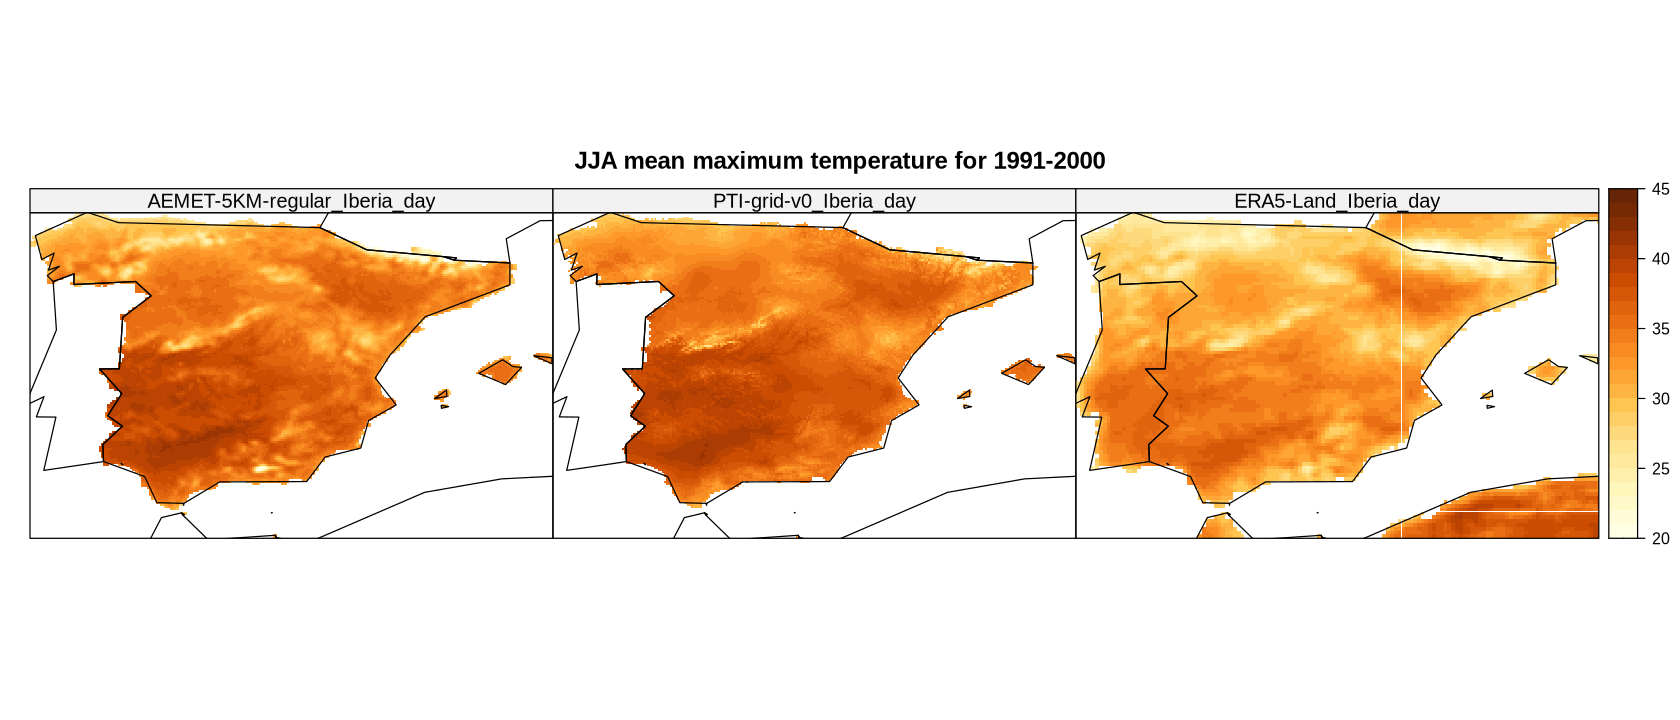

In [58]:
spatialPlot(climatology(tasmax.jja.grid), 
            backdrop.theme = "countries", 
            at = seq(20, 45, 1),
            set.min = 20,
            set.max = 45,
            color.theme = "YlOrBr",
            layout = c(getShape(tasmax.jja.grid, "member"), 1),
            main = "JJA mean maximum temperature for 1991-2000",
            strip = strip.custom(factor.levels = tasmax.jja.grid$Members))

### 5. Análisis básico

Los mapas que acabamos de crear en la sección anterior, muestran la media estacional (Junio-Julio-Agosto) de las temperaturas máximas mensuales en el periodo 1991-2000. Si queremos visualizar la media climatológica de las máximas estacionales, debemos realizar la agregación estacional con la función `aggregateGrid`. Previamente, nos aseguraremos que posibles valores `-Inf` se reconfiguren como `NA`.

In [62]:
tasmax.jja.grid.max <- aggregateGrid(tasmax.jja.grid, aggr.y = list(FUN = "max", na.rm = TRUE)) %>% suppressWarnings

[2025-01-16 16:22:31.799279] Performing annual aggregation...

[2025-01-16 16:23:49.784806] Done.



Posteriormente, nos aseguraremos que posibles valores -Inf generados internamente por la función de base `max` se reconfiguren como `NA`.

In [64]:
tasmax.jja.grid.max$Data[which(is.infinite(tasmax.jja.grid.max$Data))] <- NA

[2025-01-16 16:25:44.069427] - Computing climatology...

[2025-01-16 16:25:44.992207] - Done.



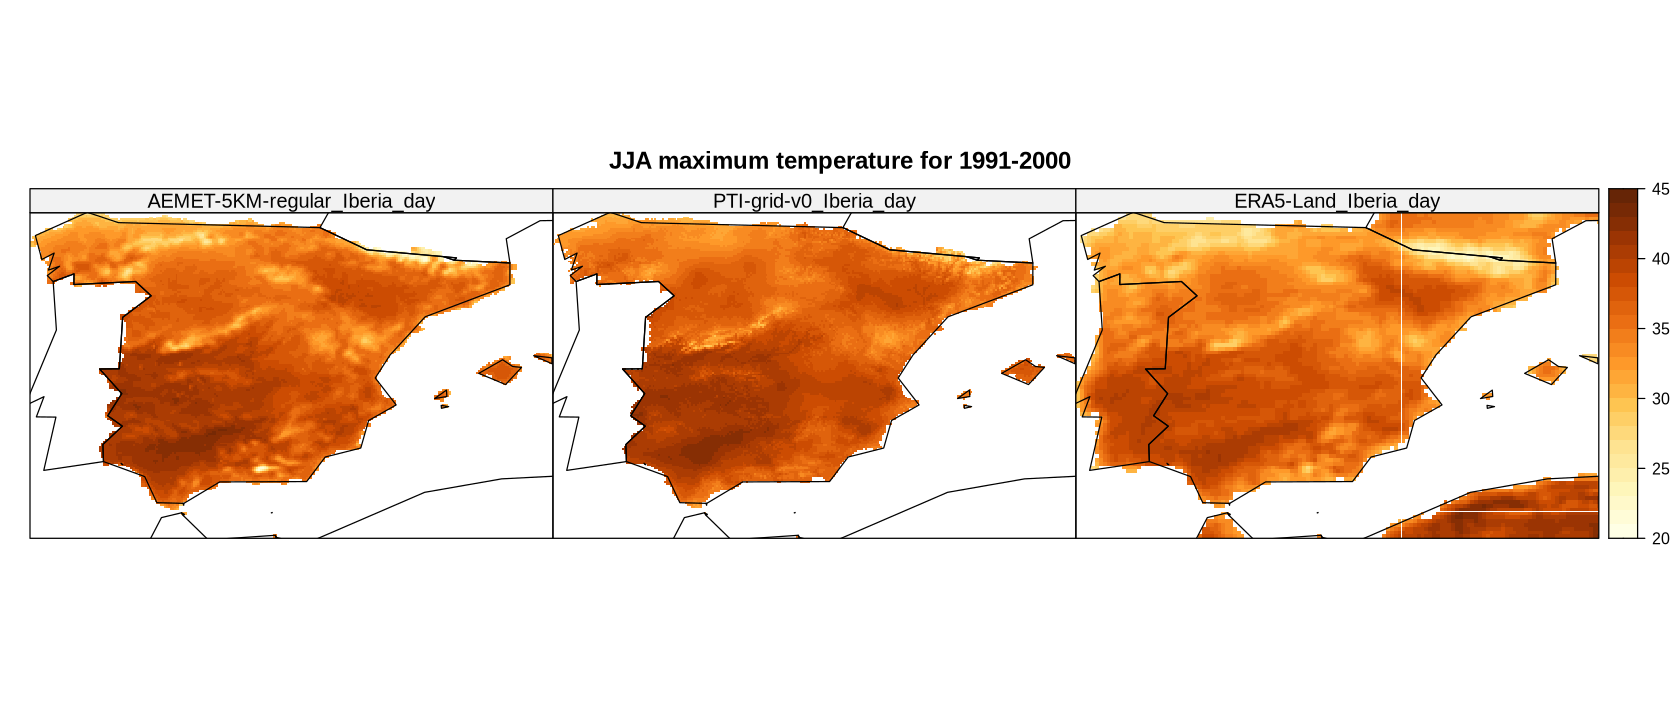

In [65]:
spatialPlot(climatology(tasmax.jja.grid.max), 
            backdrop.theme = "countries", 
            at = seq(20, 45, 1),
            set.min = 20,
            set.max = 45,
            color.theme = "YlOrBr", 
            layout = c(getShape(tasmax.jja.grid.max, "member"), 1),
            main = "JJA maximum temperature for 1991-2000",
            strip = strip.custom(factor.levels = tasmax.jja.grid.max$Members))

Para ver las series temporales de la media espacial aplicaremos la función `temporalPlot`, que internamente realiza la aggregación espacial (por defecto la media). Sin embargo, dado que no todos los datasets tienen los valores acotados al territorio español, para que las medias espaciales sean comparables, debemos aplicar primero una máscara. Esta máscara la podemos generar a partir del dataset `AEMET-5KM-regular_Iberia_day` (el miembro en primera posición en nuestro `grid`), que es nuestra referencia en este notebook.

[2025-01-16 16:35:21.177652] - Computing climatology...

[2025-01-16 16:35:21.493936] - Done.



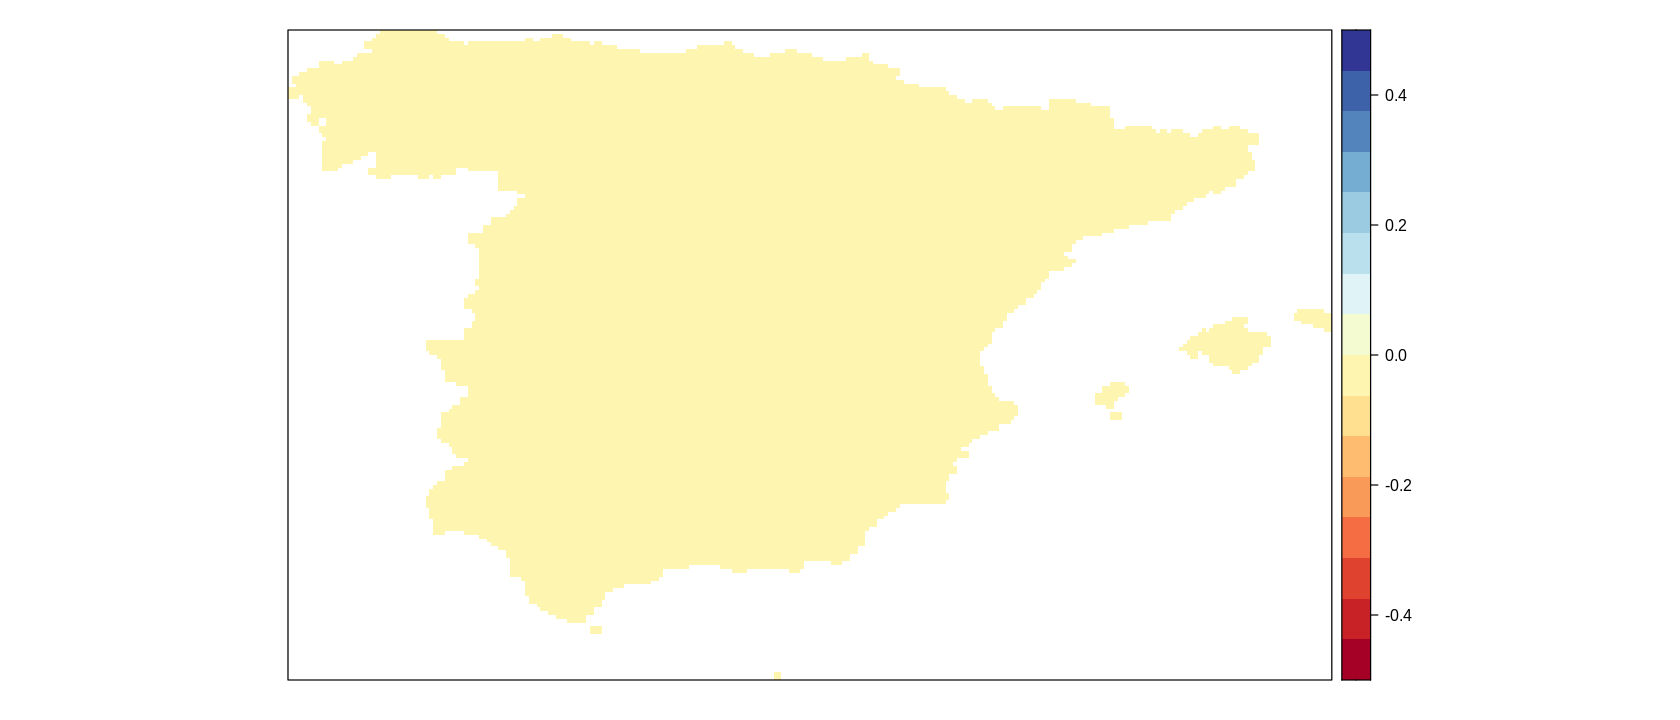

In [70]:
mask <- tasmax.jja.grid.max %>% subsetGrid(members = 1) %>% gridArithmetics(0, operator = "*")
spatialPlot(climatology(mask))

Posteriormente, aplicamos la máscara.

In [72]:
tasmax.jja.grid.max.masked <- gridArithmetics(tasmax.jja.grid.max, rep(list(mask), 
                                                                        getShape(tasmax.jja.grid.max, "member")) %>% bindGrid(dimension = "member"), 
                                               operator = "+") 

Podemos comprobar el resultado volviendo a pintar los mapas.

[2025-01-16 16:37:39.328443] - Computing climatology...

[2025-01-16 16:37:40.339125] - Done.



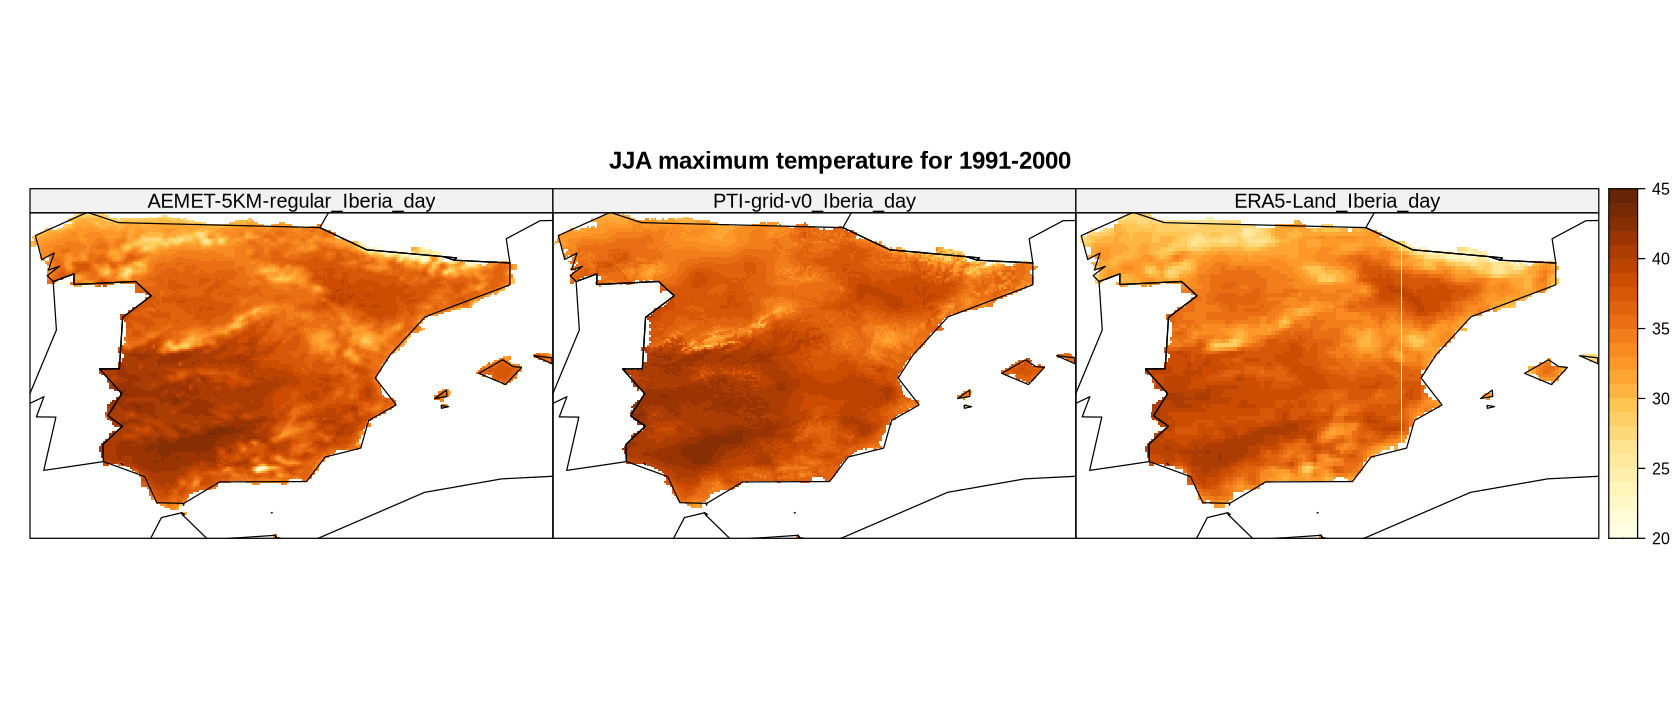

In [73]:
spatialPlot(climatology(tasmax.jja.grid.max.masked), 
            backdrop.theme = "countries", 
            at = seq(20, 45, 1),
            set.min = 20,
            set.max = 45,
            color.theme = "YlOrBr", 
            layout = c(getShape(tasmax.jja.grid.max, "member"), 1),
            main = "JJA maximum temperature for 1991-2000",
            strip = strip.custom(factor.levels = tasmax.jja.grid.max$Members))

Ahora ya podemos comparar las medias regionales. La función `temporalPlot` reconocerá la dimensión miembro del `grid`, y dibujará la media multi-miembro, así como el rango multi-miembro, que se representará como una sombra.

pad applied on the interval: year



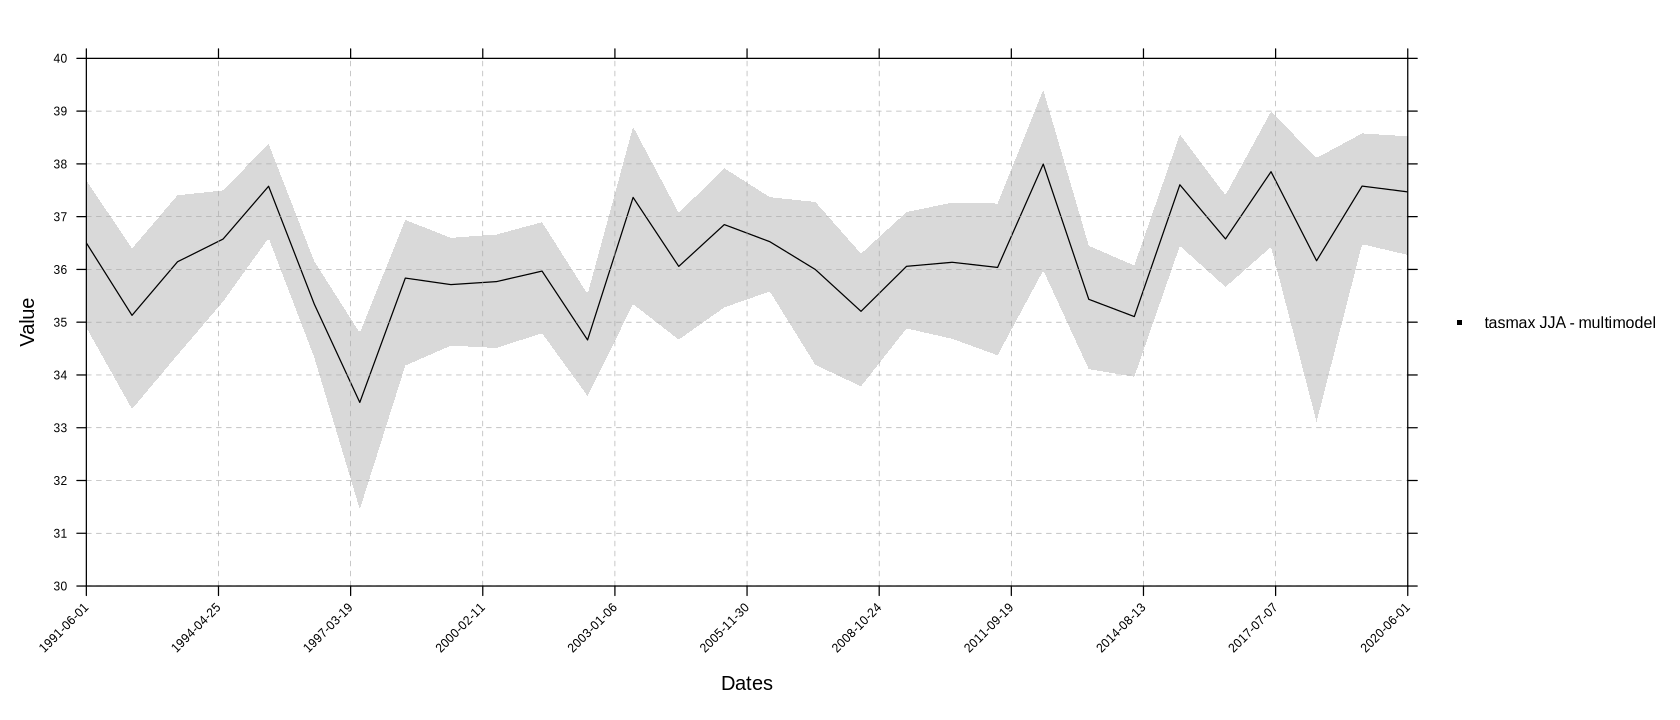

In [78]:
temporalPlot("tasmax JJA - multimodel" = tasmax.jja.grid.max.masked, xyplot.custom = list(ylim = c(30, 40)))

Podemos añadir las series de cada miembro independientemente. Recordemos los nombres de los diferentes miembros:

In [87]:
tasmax.jja.grid.max.masked$Members

[1] "AEMET-5KM-regular_Iberia_day" "PTI-grid-v0_Iberia_day"      
[3] "ERA5-Land_Iberia_day"

Ahora aplicaremos `subsetGrid` para extraer cada miembro y los añadiremos a `temporalPlot` incluyendo los nombres correspondientes.

pad applied on the interval: year

pad applied on the interval: year

pad applied on the interval: year

pad applied on the interval: year



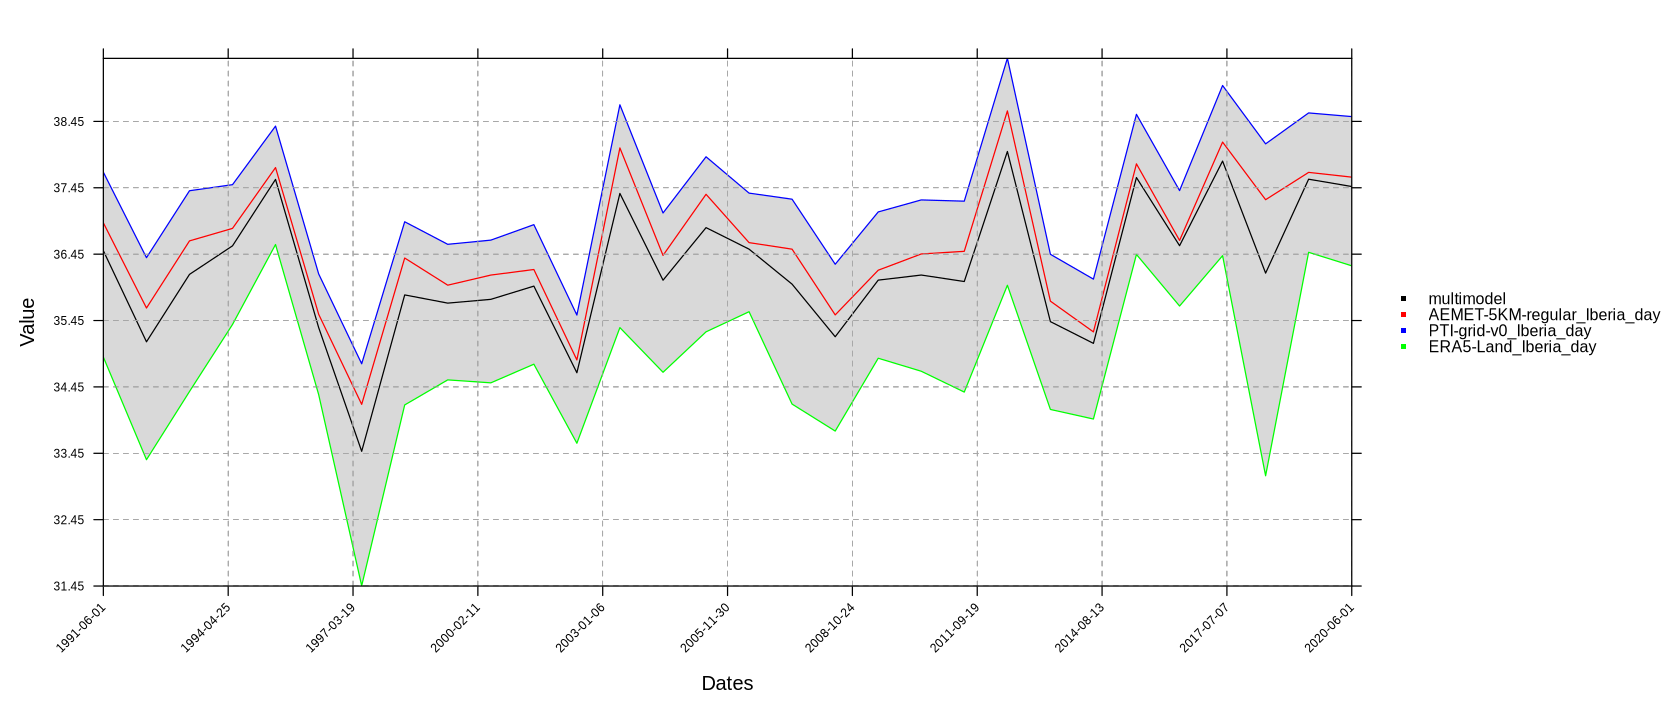

In [88]:
independent.members <- lapply(1:length(datasets$dataset), function(i) subsetGrid(tasmax.jja.grid.max.masked, members = i))

temporalPlot("multimodel" = tasmax.jja.grid.max.masked, 
             "AEMET-5KM-regular_Iberia_day" = independent.members[[1]],
             "PTI-grid-v0_Iberia_day" = independent.members[[2]],
             "ERA5-Land_Iberia_day" = independent.members[[3]])

Ejecuta `help(temporalPlot)` para ver todas las posibilidades gráficas que ofrece.

La función que genera la figura de series temporales que hemos utilizado anteriormente realiza automáticamente la agregación espacial de los datos, utilizando la media como función de agregación por defecto y **ponderando los valores según la latitud**. Sin embargo, podemos controlar esta operación utilizando el parámetro `aggr.spatial`, tanto en la función `temporalPlot`, como en la función `aggregateGrid` si queremos generar el objeto agregado. En el siguiente ejemplo, calculamos la máxima espacial:

In [90]:
tasmax.jja.regional.max <- aggregateGrid(tasmax.jja.grid.max.masked, aggr.spatial = list(FUN = "max", na.rm = TRUE))

Spatial weighting skipped: It only applies to 'mean' aggregation function

[2025-01-16 16:58:00.209781] - Aggregating spatially...

[2025-01-16 16:58:00.368306] - Done.



También podemos crear las series temporales del objeto previamente agregado:

pad applied on the interval: year



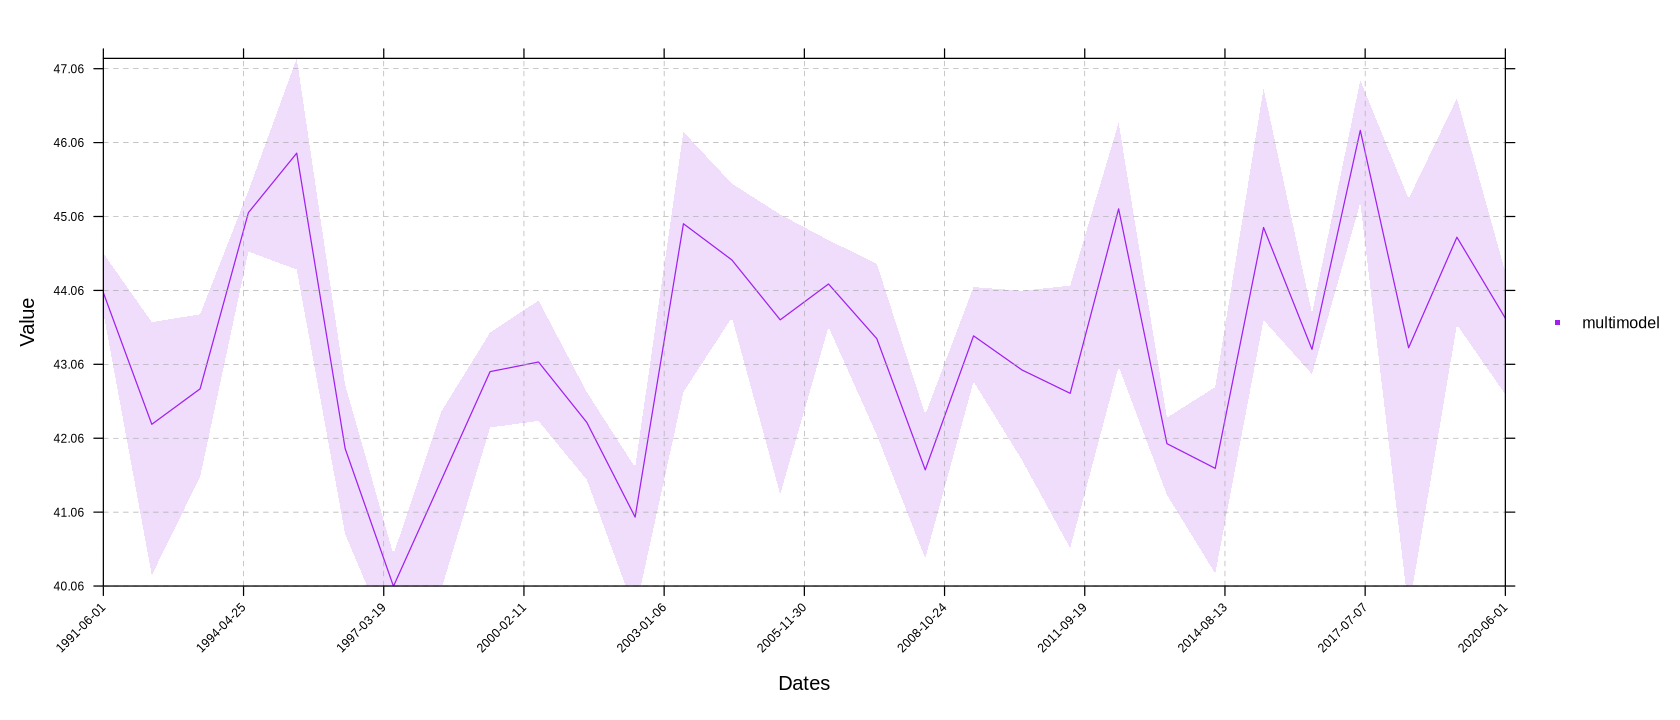

In [92]:
temporalPlot("multimodel" = tasmax.jja.regional.max, cols = "purple")

El **framework *climate4R*** ofrece muchas otras **funcionalidades de operaciones espaciales y temporales**, como **interpolación, subsetting o intersección espacial**. Además, brinda funcionalidades para la **corrección de sesgo y downscaling**. Consulta [Iturbide et al., 2019](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub) y el repositorio de [github de climate4R](https://github.com/SantanderMetGroup/climate4R) para más información.


***

### Session Info

In [19]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/envs/climate4r/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=en_US.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=en_US.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=en_US.UTF-8          LC_NAME=en_US.UTF-8          
 [9] LC_ADDRESS=en_US.UTF-8        LC_TELEPHONE=en_US.UTF-8     
[11] LC_MEASUREMENT=en_US.UTF-8    LC_IDENTIFICATION=en_US.UTF-8

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] magrittr_2.0.3      lattice_0.22-6      visualizeR_1.6.4   
[4] transformeR_2.2.2   loadeR_1.8.1        climate4R.UDG_0.2.6
[7] loadeR.java_1.1.1   rJava_1.0-11        repr_1.1.7         

loaded via 